

# Google Colab with Google Drive



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Install

In [2]:
!pip install geopy
!pip install pyproj
!pip install nltk
!pip install konlpy
!pip install git+https://github.com/ssut/py-hanspell.git
!pip install gensim
!pip install Korpora

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-4hqw41b4
  Running command git clone --filter=blob:none --quiet https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-4hqw41b4
  Resolved https://github.com/ssut/py-hanspell.git to commit fdc6ca50c19f1c85971437a072d89d4e5ce024b8
  Preparing metadata (setup.py) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-pyt

# Import

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Random Seed fix

In [4]:
import random as python_random # 시드값 고정
seed_num = 42
np.random.seed(seed_num)
python_random.seed(seed_num)

# 실행 환경

In [5]:
import platform

# OS
platform.platform()

'Linux-5.15.107+-x86_64-with-glibc2.31'

In [6]:
# 런타임 유형 : CPU
print('런타임 유형 : CPU')
print()
!cat /proc/cpuinfo

런타임 유형 : CPU

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 4
core id		: 0
cpu cores	: 2
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignme

In [77]:
import sys
import sklearn
import numpy
import pandas
import matplotlib

sys.version
print('-Google Colab-')
!cat /etc/issue.net
!python --version
print('Numpy ' + numpy.__version__)
print('Pandas ' + pandas.__version__)
print('Sklearn ' + sklearn.__version__)
print('Matplotlib ' + matplotlib.__version__)
print('Seaborn ' + sns.__version__)

-Google Colab-
Ubuntu 20.04.6 LTS
Python 3.10.12
Numpy 1.22.4
Pandas 1.5.3
Sklearn 1.2.2
Matplotlib 3.7.1
Seaborn 0.12.2


# **데이터**

## Data Import

### 식당 데이터

In [ ]:
'''
food_origin = pd.read_csv('/content/drive/MyDrive/TextMining/원본 데이터/식당 원본.csv')

# 오승준
oh1 = pd.read_csv('/content/drive/MyDrive/TextMining/식당 데이터/오승준4000.csv')
oh2 = pd.read_csv('/content/drive/MyDrive/TextMining/식당 데이터/오승준8000.csv')
oh3 = pd.read_csv('/content/drive/MyDrive/TextMining/식당 데이터/오승준12000.csv')
oh4 = pd.read_csv('/content/drive/MyDrive/TextMining/식당 데이터/오승준16000.csv')

# 주다영
ju1 = pd.read_csv('/content/drive/MyDrive/TextMining/식당 데이터/주다영4000.csv')
ju2 = pd.read_csv('/content/drive/MyDrive/TextMining/식당 데이터/주다영8000.csv')
ju3 = pd.read_csv('/content/drive/MyDrive/TextMining/식당 데이터/주다영12000.csv')
ju4 = pd.read_csv('/content/drive/MyDrive/TextMining/식당 데이터/주다영16000.csv')

# 이원빈
le1 = pd.read_csv('/content/drive/MyDrive/TextMining/식당 데이터/이원빈16000개.csv')

# 이현지
le2 = pd.read_csv('/content/drive/MyDrive/TextMining/식당 데이터/이현지16000개.csv')

food = pd.concat([oh1,oh2,oh3,oh4,ju1,ju2,ju3,ju4,le1,le2])
food['사업장명'] = food['검색항목'].str.replace(r' \w+구', '', regex=True)
food['지역구'] = food['검색항목'].str.extract(r'\s(\w+구)')

merged_food = pd.merge(food, food_origin[['사업장명', '지역구','좌표정보(X)', '좌표정보(Y)', '도로명주소', '업태구분명']], on=['사업장명','지역구'], how='left', suffixes=('', '_origin'))
merged_food = merged_food.dropna(subset=['업종', '좌표정보(X)'])
food = merged_food.copy()

# food['장소명'] = food_origin['사업장명']
# food['주소'] = food_origin['도로명주소']
# food['업태'] = food_origin['업태구분명']
# food['x'] = food_origin['좌표정보(X)']
# food['y'] = food_origin['좌표정보(Y)']
food.rename(columns={'좌표정보(X)': 'x'}, inplace=True)
food.rename(columns={'좌표정보(Y)': 'y'}, inplace=True)
food.rename(columns={'도로명주소': '주소'}, inplace=True)
food.rename(columns={'사업장명': '장소명'}, inplace=True)
food.rename(columns={'업태구분명': '업태'}, inplace=True)
food = food.dropna(axis=0,thresh=7)
food = food.drop(columns=['검색항목'])
food = food.dropna(subset=['주소'])
food
'''

"\nfood_origin = pd.read_csv('/content/drive/MyDrive/TextMining/원본 데이터/식당 원본.csv')\n\n# 오승준\noh1 = pd.read_csv('/content/drive/MyDrive/TextMining/식당 데이터/오승준4000.csv')\noh2 = pd.read_csv('/content/drive/MyDrive/TextMining/식당 데이터/오승준8000.csv')\noh3 = pd.read_csv('/content/drive/MyDrive/TextMining/식당 데이터/오승준12000.csv')\noh4 = pd.read_csv('/content/drive/MyDrive/TextMining/식당 데이터/오승준16000.csv')\n\n# 주다영\nju1 = pd.read_csv('/content/drive/MyDrive/TextMining/식당 데이터/주다영4000.csv')\nju2 = pd.read_csv('/content/drive/MyDrive/TextMining/식당 데이터/주다영8000.csv')\nju3 = pd.read_csv('/content/drive/MyDrive/TextMining/식당 데이터/주다영12000.csv')\nju4 = pd.read_csv('/content/drive/MyDrive/TextMining/식당 데이터/주다영16000.csv')\n\n# 이원빈\nle1 = pd.read_csv('/content/drive/MyDrive/TextMining/식당 데이터/이원빈16000개.csv')\n\n# 이현지\nle2 = pd.read_csv('/content/drive/MyDrive/TextMining/식당 데이터/이현지16000개.csv')\n\nfood = pd.c

### 장소 데이터

In [ ]:
'''
place_origin = pd.read_csv('/content/drive/MyDrive/TextMining/원본 데이터/장소 원본.csv')
place = pd.read_csv('/content/drive/MyDrive/TextMining/장소 데이터/result_place.csv')
place['장소명'] = place_origin['문화시설명']
place['주소'] = place_origin['주소']
place['업태'] = place_origin['주제분류']
place['x'] = place_origin['경도']
place['y'] = place_origin['위도']
place['지역구'] = place_origin['지역구']
place = place.reset_index(drop=False)
#place = place.dropna(axis=0,thresh=5)
place = place.drop(columns='검색항목')
place = place.drop(columns=['별점','대표메뉴','업태'])
place = place.dropna(subset=['주소'])
place
'''

"\nplace_origin = pd.read_csv('/content/drive/MyDrive/TextMining/원본 데이터/장소 원본.csv')\nplace = pd.read_csv('/content/drive/MyDrive/TextMining/장소 데이터/result_place.csv')\nplace['장소명'] = place_origin['문화시설명']\nplace['주소'] = place_origin['주소']\nplace['업태'] = place_origin['주제분류']\nplace['x'] = place_origin['경도']\nplace['y'] = place_origin['위도']\nplace['지역구'] = place_origin['지역구']\nplace = place.reset_index(drop=False)\n#place = place.dropna(axis=0,thresh=5)\nplace = place.drop(columns='검색항목')\nplace = place.drop(columns=['별점','대표메뉴','업태'])\nplace = place.dropna(subset=['주소'])\nplace\n"

### 지역 데이터

In [ ]:
gu_list = ['송파구','중구','종로구','용산구','강남구','서초구','서대문구','노원구','동대문구','마포구','영등포구','성동구','광진구']

### 지하철역 데이터

In [ ]:
'''
metro = pd.read_csv('/content/drive/MyDrive/TextMining/이외 데이터/서울교통공사_역주소 및 전화번호_20230331.csv', encoding='EUC-KR', encoding_errors='ignore', low_memory=False)
metro = metro[['역명','도로명주소']]
metro['역명'] = metro['역명'] + '역'
metro = metro.rename(columns={'도로명주소': '주소'})
metro.head()
'''

"\nmetro = pd.read_csv('/content/drive/MyDrive/TextMining/이외 데이터/서울교통공사_역주소 및 전화번호_20230331.csv', encoding='EUC-KR', encoding_errors='ignore', low_memory=False)\nmetro = metro[['역명','도로명주소']]\nmetro['역명'] = metro['역명'] + '역'\nmetro = metro.rename(columns={'도로명주소': '주소'})\nmetro.head()\n"

## 좌표 정보 추가

### 식당 데이터

In [ ]:
'''
from pyproj import CRS, Transformer

# 좌표계 정의
crs_WGS84 = CRS.from_epsg(32652)  # WGS84
crs_Korea2000 = CRS.from_epsg(2097)

transformer = Transformer.from_crs(crs_Korea2000, crs_WGS84)

a = food.copy()

def convert_coordinates(row):
    x = row['x']
    y = row['y']
    lon, lat = transformer.transform(x, y)
    return lon, lat

a['경도'], a['위도'] = zip(*food.apply(convert_coordinates, axis=1))
a = a.drop(columns=['x', 'y'])
a.to_csv('/content/drive/MyDrive/TextMining/좌표추가/식당_좌표3.csv', index=False)
'''

"\nfrom pyproj import CRS, Transformer\n\n# 좌표계 정의\ncrs_WGS84 = CRS.from_epsg(32652)  # WGS84\ncrs_Korea2000 = CRS.from_epsg(2097)  \n\ntransformer = Transformer.from_crs(crs_Korea2000, crs_WGS84)\n\na = food.copy()\n\ndef convert_coordinates(row):\n    x = row['x']\n    y = row['y']\n    lon, lat = transformer.transform(x, y)\n    return lon, lat\n\na['경도'], a['위도'] = zip(*food.apply(convert_coordinates, axis=1))\na = a.drop(columns=['x', 'y'])\na.to_csv('/content/drive/MyDrive/TextMining/좌표추가/식당_좌표3.csv', index=False)\n"

In [ ]:
'''
# 지역구 중심 좌표 데이터
district_coordinates = {
    '송파구': (37.5045, 127.1141),
    '중구': (37.5635, 126.9975),
    '종로구': (37.5728, 126.9795),
    '용산구': (37.5311, 126.9810),
    '강남구': (37.5172, 127.0473),
    '서초구': (37.4837, 127.0324),
    '서대문구': (37.5791, 126.9368),
    '노원구': (37.6552, 127.0771),
    '동대문구': (37.5835, 127.0501),
    '마포구': (37.5665, 126.9018),
    '영등포구': (37.5262, 126.8959),
    '성동구': (37.5500, 127.0413),
    '광진구': (37.5388, 127.0823)
}

# food 데이터프레임에 대해 '지역구'에 따라 'x'와 'y' 열을 중심 좌표값으로 채우는 함수
def assign_coordinates(row):
    gu = row['지역구']
    if gu in district_coordinates:
        row['경도'] = district_coordinates[gu][1]
        row['위도'] = district_coordinates[gu][0]
    return row

# '지역구'에 따라 'x'와 'y' 열을 채운 데이터프레임 생성
food = food.apply(assign_coordinates, axis=1)
food = food.drop(columns='지역구')
food.to_csv('/content/drive/MyDrive/TextMining/좌표추가/식당_좌표3.csv', index=False)
'''

"\n# 지역구 중심 좌표 데이터\ndistrict_coordinates = {\n    '송파구': (37.5045, 127.1141),\n    '중구': (37.5635, 126.9975),\n    '종로구': (37.5728, 126.9795),\n    '용산구': (37.5311, 126.9810),\n    '강남구': (37.5172, 127.0473),\n    '서초구': (37.4837, 127.0324),\n    '서대문구': (37.5791, 126.9368),\n    '노원구': (37.6552, 127.0771),\n    '동대문구': (37.5835, 127.0501),\n    '마포구': (37.5665, 126.9018),\n    '영등포구': (37.5262, 126.8959),\n    '성동구': (37.5500, 127.0413),\n    '광진구': (37.5388, 127.0823)\n}\n\n# food 데이터프레임에 대해 '지역구'에 따라 'x'와 'y' 열을 중심 좌표값으로 채우는 함수\ndef assign_coordinates(row):\n    gu = row['지역구']\n    if gu in district_coordinates:\n        row['경도'] = district_coordinates[gu][1]\n        row['위도'] = district_coordinates[gu][0]\n    return row\n\n# '지역구'에 따라 'x'와 'y' 열을 채운 데이터프레임 생성\nfood = food.apply(assign_coordinates, axis=1)\nfood = food.drop(columns='지역구')\nfood.to_csv('/content/drive/MyDrive/TextMining/좌표추가/식당_좌표3.csv', index=False)\n"

### 지하철역 데이터

In [ ]:
'''
import re
from geopy.geocoders import Nominatim
geo_local = Nominatim(user_agent='South Korea')


# 역명 전처리
def remove_parentheses(s):
    return re.sub(r'\([^)]*\)', '', s)

metro['역명'] = metro['역명'].apply(remove_parentheses)

# 위도 반환 함수
def geocoding_lat(address):
    try:
        geo = geo_local.geocode(address)
        return geo.latitude

    except:
        return 0

# 경도 반환 함수
def geocoding_lon(address):
    try:
        geo = geo_local.geocode(address)
        return geo.longitude

    except:
        return 0

# 변환
metro['위도'] = metro['역명'].apply(geocoding_lat)
metro['경도'] = metro['역명'].apply(geocoding_lon)
metro.to_csv('/content/drive/MyDrive/TextMining/좌표추가/지하철_좌표.csv',index=0)
'''

"\nimport re\nfrom geopy.geocoders import Nominatim\ngeo_local = Nominatim(user_agent='South Korea')\n\n\n# 역명 전처리\ndef remove_parentheses(s):\n    return re.sub(r'\\([^)]*\\)', '', s)\n\nmetro['역명'] = metro['역명'].apply(remove_parentheses)\n\n# 위도 반환 함수\ndef geocoding_lat(address):\n    try:\n        geo = geo_local.geocode(address)\n        return geo.latitude\n\n    except:\n        return 0\n\n# 경도 반환 함수\ndef geocoding_lon(address):\n    try:\n        geo = geo_local.geocode(address)\n        return geo.longitude\n\n    except:\n        return 0\n        \n# 변환\nmetro['위도'] = metro['역명'].apply(geocoding_lat)\nmetro['경도'] = metro['역명'].apply(geocoding_lon)\nmetro.to_csv('/content/drive/MyDrive/TextMining/좌표추가/지하철_좌표.csv',index=0)\n"

### 장소 데이터

In [ ]:
'''
place = place.rename(columns={'x': '경도'})
place = place.rename(columns={'y': '위도'})

from tqdm import tqdm
import re
# 'OOO로 ~길'의 경우 사이에 띄어쓰기 제거
def remove_space_between_pattern(text):
    pattern = r'(\w+)로\s(\d+)길'  # OOO로 (숫자)길 패턴 정규표현식
    return re.sub(pattern, lambda x: x.group().replace(" ", ""), text)

# 주소 데이터 정리 함수2
def clean_address2(address):
    a = address.split(' ')
    return " ".join(a[1:5])

place['주소'] = place['주소'].apply(clean_address2)
place['주소'] = place['주소'].apply(remove_space_between_pattern)
'''

'\nplace = place.rename(columns={\'x\': \'경도\'})\nplace = place.rename(columns={\'y\': \'위도\'})\n\nfrom tqdm import tqdm\nimport re\n# \'OOO로 ~길\'의 경우 사이에 띄어쓰기 제거\ndef remove_space_between_pattern(text):\n    pattern = r\'(\\w+)로\\s(\\d+)길\'  # OOO로 (숫자)길 패턴 정규표현식\n    return re.sub(pattern, lambda x: x.group().replace(" ", ""), text)\n\n# 주소 데이터 정리 함수2\ndef clean_address2(address):\n    a = address.split(\' \')\n    return " ".join(a[1:5])    \n\nplace[\'주소\'] = place[\'주소\'].apply(clean_address2)\nplace[\'주소\'] = place[\'주소\'].apply(remove_space_between_pattern)\n'

In [ ]:
'''
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import re

# 도로명 주소를 기반으로 x, y 좌표를 생성하는 함수
def geocode_address(address):
    geolocator = Nominatim(user_agent="my_geocoder")
    try:
        location = geolocator.geocode(address)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except GeocoderTimedOut:
        return geocode_address(address)

data = place

# 도로명 주소를 기반으로 x, y 좌표 생성
x_coords = []
y_coords = []
for address in data['주소']:
    x, y = geocode_address(address)
    x_coords.append(x)
    y_coords.append(y)

# x, y 좌표를 데이터프레임에 추가
data['x'] = x_coords
data['y'] = y_coords
'''

'\nimport pandas as pd\nfrom geopy.geocoders import Nominatim\nfrom geopy.exc import GeocoderTimedOut\nimport re\n\n# 도로명 주소를 기반으로 x, y 좌표를 생성하는 함수\ndef geocode_address(address):\n    geolocator = Nominatim(user_agent="my_geocoder")\n    try:\n        location = geolocator.geocode(address)\n        if location:\n            return location.latitude, location.longitude\n        else:\n            return None, None\n    except GeocoderTimedOut:\n        return geocode_address(address)\n\ndata = place\n\n# 도로명 주소를 기반으로 x, y 좌표 생성\nx_coords = []\ny_coords = []\nfor address in data[\'주소\']:\n    x, y = geocode_address(address)\n    x_coords.append(x)\n    y_coords.append(y)\n\n# x, y 좌표를 데이터프레임에 추가\ndata[\'x\'] = x_coords\ndata[\'y\'] = y_coords\n'

In [ ]:
'''
# 'x' 열의 Null 값에 '경도' 열의 값 대체
data['x'] = np.where(data['x'].isnull(), data['경도'], data['x'])

# 'y' 열의 Null 값에 '위도' 열의 값 대체
data['y'] = np.where(data['y'].isnull(), data['위도'], data['y'])
data = data.drop(columns=['위도','경도'])
data = data.rename(columns={'x': '위도'})
data = data.rename(columns={'y': '경도'})
data.to_csv('/content/drive/MyDrive/TextMining/좌표추가/장소_좌표2.csv',index=0)
'''

"\n# 'x' 열의 Null 값에 '경도' 열의 값 대체\ndata['x'] = np.where(data['x'].isnull(), data['경도'], data['x'])\n\n# 'y' 열의 Null 값에 '위도' 열의 값 대체\ndata['y'] = np.where(data['y'].isnull(), data['위도'], data['y'])\ndata = data.drop(columns=['위도','경도'])\ndata = data.rename(columns={'x': '위도'})\ndata = data.rename(columns={'y': '경도'})\ndata.to_csv('/content/drive/MyDrive/TextMining/좌표추가/장소_좌표2.csv',index=0)\n"

In [ ]:
'''
# 지역구 중심 좌표 데이터
district_coordinates = {
    '송파구': (37.5045, 127.1141),
    '중구': (37.5635, 126.9975),
    '종로구': (37.5728, 126.9795),
    '용산구': (37.5311, 126.9810),
    '강남구': (37.5172, 127.0473),
    '서초구': (37.4837, 127.0324),
    '서대문구': (37.5791, 126.9368),
    '노원구': (37.6552, 127.0771),
    '동대문구': (37.5835, 127.0501),
    '마포구': (37.5665, 126.9018),
    '영등포구': (37.5262, 126.8959),
    '성동구': (37.5500, 127.0413),
    '광진구': (37.5388, 127.0823)
}

# '위도'와 '경도' 값이 잘못된 행들에 대해서만 수정하는 함수
def modify_coordinates(row, center_coordinates):
    if row['위도'] > row['경도']:
        # '지역구' 값을 이용하여 지역구의 중심 좌표로 수정
        row['위도'] = center_coordinates[row['지역구']][0]
        row['경도'] = center_coordinates[row['지역구']][1]
    return row

data = data.apply(lambda row: modify_coordinates(row, district_coordinates), axis=1)
data.to_csv('/content/drive/MyDrive/TextMining/좌표추가/장소_좌표3.csv',index=0)
'''

"\n# 지역구 중심 좌표 데이터\ndistrict_coordinates = {\n    '송파구': (37.5045, 127.1141),\n    '중구': (37.5635, 126.9975),\n    '종로구': (37.5728, 126.9795),\n    '용산구': (37.5311, 126.9810),\n    '강남구': (37.5172, 127.0473),\n    '서초구': (37.4837, 127.0324),\n    '서대문구': (37.5791, 126.9368),\n    '노원구': (37.6552, 127.0771),\n    '동대문구': (37.5835, 127.0501),\n    '마포구': (37.5665, 126.9018),\n    '영등포구': (37.5262, 126.8959),\n    '성동구': (37.5500, 127.0413),\n    '광진구': (37.5388, 127.0823)\n}\n\n# '위도'와 '경도' 값이 잘못된 행들에 대해서만 수정하는 함수\ndef modify_coordinates(row, center_coordinates):\n    if row['위도'] > row['경도']:\n        # '지역구' 값을 이용하여 지역구의 중심 좌표로 수정\n        row['위도'] = center_coordinates[row['지역구']][0]\n        row['경도'] = center_coordinates[row['지역구']][1]\n    return row\n\ndata = data.apply(lambda row: modify_coordinates(row, district_coordinates), axis=1)\ndata.to_csv('/content/drive/MyDrive/TextMining/좌표추가/장소_좌표3.csv',index=0)\n"

###리뷰 데이터 전처리

In [ ]:
'''
import re
from konlpy.tag import Okt

# 형태소 분석기 인스턴스 생성
okt = Okt()

data1 = food.copy()
data2 = place.copy()

def extract_hangul(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', text)
    return result

for i in ['리뷰_0','리뷰_1','리뷰_2','리뷰_3','리뷰_4','리뷰_5'] :
  data1[i] = data1[i].fillna('').apply(extract_hangul)
  data1[i] = data1[i].apply(lambda x: okt.pos(x, stem=True))

for i in ['리뷰_0','리뷰_1','리뷰_2','리뷰_3','리뷰_4','리뷰_5'] :
  data2[i] = data2[i].fillna('').apply(extract_hangul)
  data2[i] = data2[i].apply(lambda x: okt.pos(x, stem=True))

data1.to_csv('/content/drive/MyDrive/TextMining/리뷰/식당_토큰화.csv',index=0)
data2.to_csv('/content/drive/MyDrive/TextMining/리뷰/장소_토큰화.csv',index=0)
'''

In [86]:
'''
a = pd.read_csv('/content/drive/MyDrive/TextMining/리뷰/식당_토큰화.csv')
b = pd.read_csv('/content/drive/MyDrive/TextMining/리뷰/장소_토큰화.csv')

data1 = a.copy()
data2 = b.copy()
'''

In [89]:
'''
def read_text_file(file_path):
    lines = []
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = [line.rstrip() for line in file.readlines()]
    return lines

# 텍스트 파일 경로 설정
file_path = '/content/drive/MyDrive/TextMining/stopword.txt'

# 텍스트 파일 읽기
stop_words = read_text_file(file_path)
'''

In [90]:
'''
from konlpy.tag import Okt

# 형태소 분석기 인스턴스 생성
okt = Okt()

# data1의 리뷰_0부터 리뷰_5까지의 열 선택
columns = ['리뷰_0', '리뷰_1', '리뷰_2', '리뷰_3', '리뷰_4', '리뷰_5']
data1_selected = data1[columns]
data2_selected = data2[columns]

def extract_pos_tags(tags):
    extracted_words = [word for word, pos in tags if pos in ['Adjective', 'Noun', 'Verb', 'Josa']]
    doc_key = ','.join(extracted_words)
    return doc_key

# data1_selected의 각 열에 대해 extract_pos_tags 함수 적용하여 doc_key 열 생성
data1['doc_key'] = data1_selected.applymap(lambda x: extract_pos_tags(eval(x))).apply(lambda x: ' '.join(x), axis=1)
data2['doc_key'] = data2_selected.applymap(lambda x: extract_pos_tags(eval(x))).apply(lambda x: ' '.join(x), axis=1)
'''

In [91]:
'''
import re
from konlpy.tag import Okt

# 형태소 분석기 인스턴스 생성
okt = Okt()

# Stopwords
stop_words = stop_words

# 길이가 1인 글자 제거
def remove_single_chars(tokens):
    filtered_tokens = [token for token in tokens if len(token) > 1]
    return filtered_tokens

# Stopwords 제거
def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

# 데이터 프레임의 열에 대해 길이가 1인 글자 제거 및 Stopwords 제거
def preprocess_text(text):
    # 쉼표로 문자열 분리하여 토큰 리스트 생성
    tokens = text.split(',')

    # 길이가 1인 글자 제거
    tokens = remove_single_chars(tokens)

    # Stopwords 제거
    tokens = remove_stopwords(tokens)

    return tokens

# 데이터 프레임의 열에 적용하여 전처리 수행
data1['doc_key'] = data1['doc_key'].apply(lambda x: preprocess_text(x))
data2['doc_key'] = data2['doc_key'].apply(lambda x: preprocess_text(x))
'''

In [92]:
'''
food = pd.read_csv('/content/drive/MyDrive/TextMining/리뷰/식당_토큰화.csv')
place = pd.read_csv('/content/drive/MyDrive/TextMining/리뷰/장소_토큰화.csv')
food['doc_key'] = data1['doc_key']
place['doc_key'] = data2['doc_key']
#food.to_csv('/content/drive/MyDrive/TextMining/리뷰/식당_리뷰_토큰화.csv',index=0)
#place.to_csv('/content/drive/MyDrive/TextMining/리뷰/장소_리뷰_토큰화.csv',index=0)
'''

In [93]:
'''
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# TF-IDF 벡터화를 위해 리스트를 문자열로 변환
food['doc_key_joined'] = food['doc_key'].apply(' '.join)
place['doc_key_joined'] = place['doc_key'].apply(' '.join)

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X1 = vectorizer.fit_transform(food['doc_key_joined'])
X2 = vectorizer.transform(place['doc_key_joined'])

# TF-IDF 값과 단어 매핑
feature_names = vectorizer.get_feature_names_out()
tfidf_values1 = X1.toarray()
tfidf_values2 = X2.toarray()

# 상위 단어 개수 설정
num_top_words = 4

def get_top_words(tfidf_values, feature_names, num_top_words):
    # 결과를 저장할 리스트
    selected_words = []

    # 각 문서에서 TF-IDF 값이 높은 상위 단어 선택
    for tfidf_value in tfidf_values:
        # 단어 인덱스를 TF-IDF 값에 따라 내림차순으로 정렬
        sorted_indices = np.argsort(tfidf_value)[::-1]

        # 상위 단어 선택
        top_words = [feature_names[idx] for idx in sorted_indices[:num_top_words]]
        selected_words.append(" ".join(top_words))

    return selected_words

# 데이터프레임에 결과 추가
food['doc_key'] = get_top_words(tfidf_values1, feature_names, num_top_words)
place['doc_key'] = get_top_words(tfidf_values2, feature_names, num_top_words)
'''

In [94]:
'''
food.to_csv('/content/drive/MyDrive/TextMining/리뷰/식당_리뷰_토큰화2.csv',index=0)
place.to_csv('/content/drive/MyDrive/TextMining/리뷰/장소_리뷰_토큰화2.csv',index=0)
'''

In [ ]:
'''
word_counts = [len(doc) for doc in mm['doc_vec'].values]  # 각 문서의 단어 개수

average_word_count = np.mean(word_counts)  # 평균 단어 개수
max_word_count = np.max(word_counts)  # 최대 단어 개수
min_word_count = np.min(word_counts)  # 최소 단어 개수

# 결과 출력
print(f"Average number of words in a document: {average_word_count}")
print(f"Maximum number of words in a document: {max_word_count}")
print(f"Minimum number of words in a document: {min_word_count}")
'''

In [ ]:
'''
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# 토큰 리스트를 공백으로 연결하여 문서로 변환
documents1 = data1['doc_key'].apply(lambda tokens: ' '.join(tokens))
documents2 = data2['doc_key'].apply(lambda tokens: ' '.join(tokens))

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix1 = vectorizer.fit_transform(documents1)
tfidf_matrix2 = vectorizer.transform(documents2)

# LSA (SVD) 적용
svd = TruncatedSVD(n_components=5)  # 5차원으로 축소
lsa_matrix1 = svd.fit_transform(tfidf_matrix1)
lsa_matrix2 = svd.transform(tfidf_matrix2)

# 임베딩 결과를 리스트로 저장
embedding1 = lsa_matrix1.tolist()
embedding2 = lsa_matrix2.tolist()

# 각 문서에 대한 벡터에 접근하여 데이터프레임에 저장
data1['doc_vec'] = embedding1
data2['doc_vec'] = embedding2

data1.to_csv('/content/drive/MyDrive/TextMining/리뷰/식당_임베딩.csv',index=0)
data2.to_csv('/content/drive/MyDrive/TextMining/리뷰/장소_임베딩.csv',index=0)
'''

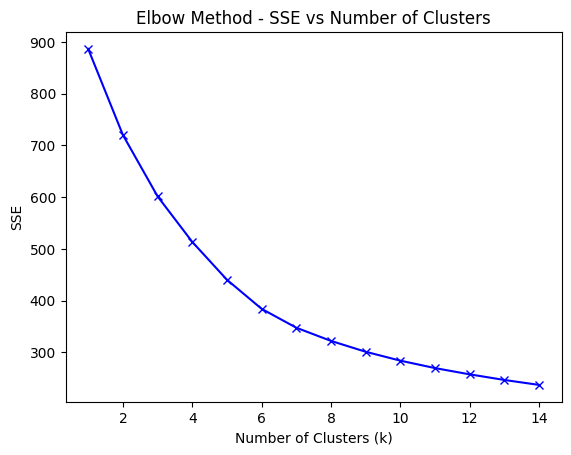

In [ ]:
'''
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# SSE
sse_values = []

# 클러스터 수를 1~15
k_values = range(1, 15)

for k in k_values:
    # Kmeans
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(lsa_matrix1)

    # SSE 계산
    sse = kmeans.inertia_
    sse_values.append(sse)

# Plot
plt.plot(k_values, sse_values, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method - SSE vs Number of Clusters')
plt.show()
'''

In [ ]:
'''
from sklearn.metrics import silhouette_score

# K-means 모델 생성 및 훈련
kmeans = KMeans(n_clusters=4, random_state=42, init='k-means++')
cluster_labels = kmeans.fit_predict(lsa_matrix1)

# 실루엣 스코어 계산
silhouette_avg = silhouette_score(lsa_matrix1, cluster_labels)

print(f"Silhouette Score: {silhouette_avg:.4f}")
'''

Silhouette Score: 0.3205




---



## New Data Import

In [7]:
food = pd.read_csv('/content/drive/MyDrive/TextMining/리뷰/식당_리뷰_토큰화2.csv')
place = pd.read_csv('/content/drive/MyDrive/TextMining/리뷰/장소_리뷰_토큰화2.csv')
metro = pd.read_csv('/content/drive/MyDrive/TextMining/좌표추가/지하철_좌표.csv')
place = place.dropna(axis=0,thresh=5)
food = food.dropna(axis=0,thresh=7)
place.drop_duplicates(subset=['장소명','업종','리뷰_0'], keep='first', inplace=True)
food.drop_duplicates(subset=['장소명','대표메뉴','리뷰_0'], keep='first', inplace=True)
display(food,place,metro)

,업종,별점,대표메뉴,리뷰_0,리뷰_1,리뷰_2,리뷰_3,리뷰_4,리뷰_5,리뷰_6,...,리뷰_8,리뷰_9,장소명,x,y,주소,경도,위도,doc_key,doc_key_joined
0,"맥주,호프",4.30,"노가리황태, 쥐포, 먹태, 오뎅탕","[('맛있다', 'Adjective'), ('분위기', 'Noun'), ('도', ...","[('마늘', 'Noun'), ('치킨', 'Noun'), ('이랑', 'Josa'...","[('너무', 'Adverb'), ('맛있다', 'Adjective'), ('자다'...","[('사장', 'Noun'), ('님', 'Suffix'), ('이', 'Josa'...","[('헌팅', 'Noun'), ('그', 'Determiner'), ('자체', '...","[('을지로', 'Noun'), ('골뱅이', 'Noun'), ('골목', 'Nou...",가성비최고!! 그리고 일하시는분들이 너무 친절하세요!!,...,역시나 사람이 많아요!ㅎㅎ,NaN,만선호프,199204.527800,451663.497755,"서울특별시 중구 을지로13길 19 (을지로3가,,2호(지상1층))",126.9975,37.5635,노가리 을지로 치킨 데포,맛있다 분위기 좋다 요즘 날씨 가면 정말 좋다 치킨 맛있다 마늘 치킨 이랑 닭발 맛...
1,양식,4.13,"치지 슈프림 프라이즈, 셰퍼드 파이 GF, BBQ 풀드 포크 파히타, 바나나 쵸코칩 와플","[('커피', 'Noun'), ('맛있다', 'Adjective'), ('분위', ...","[('부리또', 'Noun'), ('따뜻하다', 'Adjective'), ('맛있다...","[('방문', 'Noun'), ('하다', 'Verb'), ('당시', 'Noun'...","[('맛', 'Noun'), ('은', 'Josa'), ('그냥', 'Noun'),...","[('최악', 'Noun'), ('향', 'Noun'), ('은', 'Josa'),...","[('재료', 'Noun'), ('들', 'Suffix'), ('의', 'Josa'...",비건음식 찾기 쉽지 않다는 점을 감안하면 너무 좋았던 곳! 다양한 메뉴가 있고 올 ...,...,비건식당은 처음와서 맛은 기대 없이 왔지만 너무 맛있었고 전체적인 밸런스가 너무 좋...,"연희 비건 맛집!! 우연히 들렀는데, 맛이 너무 강하지도 않고, 건강하게 맛있게 잘...",비건 앤 비욘드(Vegan and Beyond),193799.251722,451744.993770,"서울특별시 서대문구 연희맛로 33, 2층 (연희동)",126.9368,37.5791,외국인 비건 롯데리아 그냥,커피 맛있다 분위 좋다 친절하다 부리또 따뜻하다 맛있다 많다 샐러드 적다 플레이 아...
2,이탈리아음식,4.40,"레드 크림 파스타, 레드 갈릭 밥스타, 레드 커리 파스타, 레드 토마토 파스타","[('아주', 'Noun'), ('옛날', 'Noun'), ('에', 'Josa')...","[('오랜', 'Modifier'), ('만', 'Noun'), ('에', 'Jos...","[('저번', 'Noun'), ('에', 'Josa'), ('친구', 'Noun')...","[('매다', 'Verb'), ('단계', 'Noun'), ('를', 'Josa')...","[('맛있다', 'Adjective'), ('맛', 'Noun'), ('을', 'J...","[('강남역', 'Noun'), ('파스타', 'Noun'), ('맛집', 'Nou...",양도 많고 맛있게 먹었습니다. :)\n음식이 맛있는데 직원분들께서 정말 친절하게 해...,...,첨 와봤는데 너무 맛있었어요❤️\n자리에서 태블릿으로 주문 후 카운터가서 선결제하고...,매콤크림파스타가 왜 베스트인지 알겠어요!\n갈비맛도 나소 매콤하고 맛있네요~~\n#...,레드,203544.130256,444833.635597,"서울특별시 강남구 언주로 533 (역삼동,지상1층)",127.0473,37.5172,레드 파스타 바비 매다,아주 옛날 방문 강남 인데 그대로 뭔가 추억 돋다 역시 그대 로고 양도 많다 무한 ...
3,"육류,고기요리",4.32,"한우등심 100g, 안심 100g, 채끝등심 100g, 부채살 100g","[('코다리', 'Noun'), ('조림', 'Noun'), ('이', 'Josa'...","[('음식', 'Noun'), ('은', 'Josa'), ('단', 'Noun'),...","[('가끔', 'Noun'), ('먹다', 'Verb'), ('가다', 'Verb'...",[],"[('맛있다', 'Adjective'), ('가성', 'Noun'), ('비', '...","[('코다리', 'Noun'), ('조림', 'Noun'), ('맛있다', 'Adj...",오늘저녁 뭘 먹을까하다가\n 코다리찜으로\n여사장님 친절하고요. 특히 코다리찜 가시...,...,단체모임 하기 좋아요,기본반찬이 푸짐해요,북한산 한우마을,196079.733490,456335.103636,"서울특별시 종로구 비봉길 9, 지상1층 (구기동)",126.9795,37.5728,코다리 조림 영양가 정석,코다리 조림 매콤 이랑 먹다 맛있다 음식 짜다 정석 코다리 큼직하다 살코기 많다 가...
4,중식당,4.37,"해물누룽지탕, 자장면, 간자장면, 삼선간자장면","[('주말', 'Noun'), ('이나', 'Josa'), ('공휴일', 'Noun...","[('친절하다', 'Adjective'), ('음식', 'Noun'), ('저렴하다...","[('저번', 'Noun'), ('에', 'Josa'), ('쟁반짜장', 'Noun...","[('우리', 'Noun'), ('가족', 'Noun'), ('모두', 'Noun'...","[('역시', 'Noun'), ('오다', 'Verb'), ('바로', 'Noun'...","[('맛있다', 'Adjective'), ('동네', 'Noun'), ('중국집',...",아이들과 호다닥 먹느라 사진이 없네요🥲🥲\n집근처라 종종 가는데 맛있어요😋😋,...,"차돌짬뽕 차돌 양 많아요, 양파랑 청경채등 야채도 많이 들어있어서 좋았습니다.",제일 좋아하는 동네 중국집! 로컬 맛집이에요,소미연,209291.985005,444258.145416,"서울특별시 송파구 가락로 86, 1층 (석촌동)",127.1141,37.5045,짬뽕 탕수육 쟁반짜장 먹다,주말 이나 공휴일 종종 찾다 좋다 가성 훌륭하다 중국집 오늘 고기 짬뽕 보다 생각 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26628,이자카야,4.49,"숙성모듬회, 지중해식토마토해물탕, 무니네물회, 일품장어구이","[('어흑너무', 'Noun'), ('맛있다', 'Adjective'), ('조용하...","[('지중해', 'Noun'), ('식', 'Suffix'), ('토마토', 'No...","[('합정역', 'Noun'), ('골목', 'Noun'), ('따르다', 'Ver...","[('숙성', 'Noun'), ('회', 'Noun'), ('가', 'Josa'),...","[('구', 'Modifier'), ('웃', 'Noun')]","[('야', 'Exclamation'), ('끼', 'Noun'), ('우동', '...",잘먹고 왔구요. 속닥하게 먹기에 좋은 분위기네요.\n근데 화장실이 불편했고 무서웠어요.,...,후기가 좋아 가봤는데 저는 평범했어요~ 가격이 저렴한 편은 아니고 맛은 무난 했습니...,지중해식 토마토 해물탕~,무니,192660.359911,449669.333282,"서울특별시 마포구 양화로6길 57-13, 지1층 (서교동, 동궁빌리지)",126.9018,37.5665,시치미 야외 마요네즈 명란,어흑너무 맛있다 조용하다 분위기 맛있다 음식 울다 사시미 에는 새우 그다음 토마토 ...
26629,베이커리,4.42,NaN,"[('꽈배기', 'Noun'), ('너무', 'Adverb'), ('맛있다', 'A...","[('한강', 'Noun'), ('갈다', 'Verb'), ('때',

,index,업종,리뷰_0,리뷰_1,리뷰_2,리뷰_3,리뷰_4,리뷰_5,리뷰_6,리뷰_7,리뷰_8,리뷰_9,장소명,주소,지역구,위도,경도,doc_key,doc_key_joined
0,0,사격장,"[('이색', 'Noun'), ('적', 'Suffix'), ('아', 'Josa'...","[('실탄', 'Noun'), ('사격', 'Noun'), ('처음', 'Noun'...","[('너무', 'Adverb'), ('빨리', 'Adverb'), ('끝나다', '...","[('명동', 'Noun'), ('실탄', 'Noun'), ('사격장', 'Noun...","[('오랜', 'Modifier'), ('만', 'Noun'), ('에', 'Jos...","[('스트레스', 'Noun'), ('가', 'Josa'), ('풀리다', 'Ver...",재밌다 생각보다 총이 무거워서 팔이 아프고 소리가 크다 하지만 군대도 안가는데 지금...,몇년만의 방문인데 너무 즐거웠습니다\n친절하고 매우 신속하네요 ㅎㅎㅎ 감사합니다 또...,오늘 처음으로 실탄사격장에 방문했어요! 🎄🥳☃️🎊🔫👩🏻‍❤️‍👨🏻\n명동이 크리스마...,난생처음 실탄사격 89점 기분좋네요😁 90점 넘을 수 있었는데~ 커플대회에 참가해서...,명동실탄사격장,서울 중구 명동8가길 27,중구,37.561930,126.986566,스트레스 명동 끝나다 풀리다,이색 명동 데이트 장소 명동 실탄 사격장 추천 해드리다 다양하다 종류 기류 가운데 ...
1,1,"체험,홍보관","[('굿', 'Noun'), ('차다', 'Verb'), ('좋다', 'Adject...","[('굿', 'Noun')]","[('좋다', 'Adjective')]",[],[],[],NaN,NaN,NaN,NaN,DMC 홍보관,서울특별시 마포구 월드컵북로 366,마포구,37.559148,126.917822,차다 좋다 힝노 미국,차다 좋다 요 굿 좋다
2,2,텔레비전방송,"[('편하다', 'Adjective')]","[('좋다', 'Adjective')]","[('굿', 'Noun')]",[],[],[],NaN,NaN,NaN,NaN,KBS 온(ON),서울 영등포구 여의공원로 13,영등포구,37.525426,126.916351,편하다 좋다 힝노 미국,편하다 좋다 굿
3,3,"관람,체험",[],[],[],[],[],[],NaN,NaN,NaN,NaN,서울김치문화체험관,서울 중구 명동8가길 47,중구,37.561788,126.986664,힝노 미개 미국 미관,
4,4,수영장,"[('아이', 'Noun'), ('가', 'Josa'), ('친구', 'Noun')...","[('튜브', 'Noun'), ('와', 'Josa'), ('수영모', 'Noun'...","[('굿', 'Noun')]","[('굿', 'Noun')]","[('굿', 'Noun')]","[('이번', 'Noun'), ('엔', 'Josa'), ('그늘', 'Noun')...",수질은 깨끗했고 /안전요원들도 수시로 체크해서 그런지 /락스냄새도 거의 ...,워터파크 저리가라 였네요.\n올해 오션월드 여의도 한강 수영장등등 다녀봤지만\n뚝섬...,너무 만족이에요\n수영모 검사 철저히 한다는건 알고 갔기억 문제 없었고 수질 깨끗하...,미리 예매 하고 가서\n편리하게 표를받을수있었어요..\n\n줄을 안서도 되는건 아니...,뚝섬 한강공원 수영장,서울특별시 광진구 동일로4길 56-10,광진구,37.535340,127.064311,튜브 그늘 모자 가리다,친구 이용 실내 공간 시설 없다 보다 챙기다 싸다 갈다 많다 튜브 사다 튜브 수영모...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,739,광장,[],[],[],[],[],[],NaN,NaN,NaN,NaN,청계광장,중구 태평로1가 1,중구,37.565480,126.977114,힝노 미개 미국 미관,
736,740,복합문화공간,"[('주차장', 'Noun'), ('이', 'Josa'), ('좋다', 'Adjec...",[],[],[],[],[],NaN,NaN,NaN,NaN,무계원,종로구 창의문로5가길 2,종로구,37.589806,126.961610,주차장 좋다 힝노 미감,주차장 좋다
737,741,도서관,"[('책', 'Noun'), ('과', 'Josa'), ('함께', 'Adverb'...","[('맛있다', 'Adjective')]","[('좋다', 'Adjective')]","[('도서관', 'Noun'), ('에서', 'Josa'), ('커피', 'Noun...","[('맛있다', 'Adjective')]","[('도서관', 'Noun'), ('안', 'Noun'), ('커피숍', 'Noun...",굿,굿,"친절하고,음료 맛있어요",NaN,송파글마루도서관,송파구 충민로 120,송파구,37.478230,127.122536,도서관 리프 레쉬 커피숍,작다 공간 음료 쿠키 맛있다 직원 친절하다 맛있다 좋다 도서관 커피 한잔 맛있다 도...
738,742,도서관,"[('굿', 'Noun')]","[('굿', 'Noun')]","[('굿', 'Noun')]","[('굿', 'Noun')]","[('굿', 'Noun')]","[('굿', 'Noun')]",굿,굿,굿,굿,영등포평생학습관,영등포구 국회대로53길 20,영등포구,37.527047,126.906574,힝노 미개 미국 미관,굿 굿 굿 굿 굿 굿


,역명,주소,위도,경도
0,서울역,서울특별시 중구 세종대로 지하2(남대문로 5가),37.553444,126.969711
1,시청역,서울특별시 중구 세종대로 지하101(정동),37.565480,126.977114
2,종각역,서울특별시 종로구 종로 지하55(종로1가),37.570175,126.983183
3,종로3가역,서울특별시 종로구 종로 지하129(종로3가),37.570440,126.992324
4,종로5가역,서울특별시 종로구 종로 지하216(종로5가),37.570987,127.002022
...,...,...,...,...
283,송파나루역,서울특별시 송파구 백제고분로 지하446(방이동),37.510670,127.111620
284,한성백제역,서울특별시 송파구 위례성대로 지하29(방이동),37.516675,127.116446
285,올림픽공원역,서울특별시 송파구 양재대로 지하1233(방이동),37.516348,127.131315
286,둔촌오륜역,서울특별시 강동구 강동대로 지하303(둔촌동),37.519682,127.138789


# Data Cleansing

In [8]:
# '업종' column의 값의 개수를 계산
count_by_category = food['업종'].value_counts()

# '업종' column의 값의 개수가 2개 이하인 행을 필터링하여 제거
food = food[~food['업종'].isin(count_by_category[count_by_category <= 3].index)]

# '업종' 필터링
no_list = ['연예기획사','자동차정비,수리','식료품제조','교습학원,교습소','신발','슈퍼,마트','신발','독서실','요리학원','동물보호단체','유아,아동용품','궁궐','종합생활용품','논술','배달대행','내과','여성의류','패션잡화','CCTV','도시락,조리식품제조','가구,인테리어','패션','1성급','전시,행사대행', '경영컨설팅', \
'셀프빨래방','이비인후과','장난감','정신건강의학과','도서,음반,문구','유기농산물마트','등산,아웃도어','남성정장','피부,체형관리','꽃집,꽃배달','침구,커튼','다방','유학,어학연수','기업','주방용품제조','가구','직업,기술학원','우산,양산','피부과','성형외과','종합패션','장례식장','광고대행','약국','문구,팬시용품','일품향','미스터빠삭', \
'약국','속옷','4성급','정육점','스포츠,오락','촬영장비','인테리어디자인','인터넷방송','플라스틱물질제조','속눈썹증모,연장','서오릉피자','수입식품','호두과자','전기공사','셔츠,체육복제작','가방,핸드백','조명,디스플레이','미용실','반려동물호텔','룸카페','제조업','의류제작','비디오,DVD','여행사','인쇄업','클럽','동물병원','페백,이바지음식',\
'3성급','휴대폰','종합도소매','모텔','과일','캐주얼웨어','임대업','귀금속,시계','고시원,고시텔', '필라테스', '밀키트','체험마을','커피가공,제조', '정형외과','악기','웨딩드레스,예복', '주방용품', '옥외,전시광고','한의원','스터디카페', '안경원','피아노','치과','영어학원','왁싱,제모', '반려동물미용', '5성급', '인테리어소품',
       '컴퓨터,모니터', '드럭스토어', '영화관', '보세의류', '병원,의원', '게스트하우스','2성급', '입시학원', '수학학원','키즈카페,실내놀이터','결혼예물','상가,아케이드','대장,항문과','복권,로또','영어회화','원예,화훼농원','남성의류','수입의류','미술,공예품','호텔','태닝','소프트웨어개발','중개업','산부인과','안과','육류가공,제조','음악학원', \
       '요가원', '정보,컨텐츠제작','유흥주점','가정의학과','라이브카페','네일아트,네일샵','화장품,향수','반찬가게','편의점','가공식품','폐백,이바지음식','식료품','예식장']

# '업종' 중 장소에 적합한 업종 필터링
place_list = ['PC방','마사지,지압','당구장','장소대여','무예/격투기','복합문화공간','공연장','스크린골프장','셀프,대여스튜디오','사주카페','보드카페','근린공원','테마카페','찜질방','운세,사주','방탈출카페','박물관','기념물','노래방','공방','한복','시민공원','이벤트,파티','스포츠시설','헬스장','공연,연극시설','북카페','독립서점','서점','목욕탕,사우나','미술관','갤러리,화랑','플라워카페','만화방','도서관','볼링장','힐링카페','전시관','사진,스튜디오']

# 장소에 적합한 데이터는 place dataframe으로
food2place = food[food['업종'].isin(place_list)]

# 필터링
food = food[~food['업종'].isin(no_list)]
food = food[~food['업종'].isin(place_list)]

# 별점 필터링
food = food[food['별점']>=3.0]

In [9]:
# 카페 데이터와 술집 데이터를 분류
food['분류'] = ''
food.loc[food['업종'].isin(['카페','브런치카페','케이크전문','와플','바나프레소','아이스크림','테이크아웃커피','홍차전문점','떡,한과','차,커피','빙수','초콜릿전문점','블루보틀','애견카페','떡카페','베이글','한방카페', '갤러리카페','차','베이커리','과일,주스전문점','도넛','호떡']), '분류'] = '카페'
food.loc[food['업종'].isin(['맥주,호프','바(BAR)','요리주점','포장마차','술집','전통,민속주점','주류','와인','이자카야']), '분류'] = '술집'

# 카페 데이터
cafe = food[food['분류']=='카페']
cafe = cafe.drop(columns='분류')

# 술집 데이터
bar = food[food['분류']=='술집']
bar = bar.drop(columns='분류')

# 음식점 데이터만을 남김
food = food[~food['분류'].isin(['카페'])]
food = food[~food['분류'].isin(['술집'])]
food = food.drop(columns='분류')

# 음식점 데이터 정제
food.loc[food['업종'].isin(['다이어트,샐러드','채식,샐러드뷔페']), '업종'] = '샐러드'
food.loc[food['업종'].isin(['스파게티,파스타전문','스테이크,립','스파게티스토리']), '업종'] = '양식'
food.loc[food['업종'].isin(['일본식라면']), '업종'] = '일식,라멘'
food.loc[food['업종'].isin(['오니기리']), '업종'] = '일식'
food.loc[food['업종'].isin(['안경할머니곱창']), '업종'] = '곱창,막창,양'
food.loc[food['업종'].isin(['게요리','대게요리']), '업종'] = '해물,생선요리'
food.loc[food['업종'].isin(['보리밥','라면','101번지남산돈까스']), '업종'] = '한식'
food.loc[food['업종'].isin(['달떡볶이','33떡볶이']), '업종'] = '분식'
food.loc[food['업종'].isin(['신룽푸마라탕']), '업종'] = '중식당'

In [10]:
import re
import pandas as pd

def menu_cleansing(df):
    # '대표메뉴' column을 문자열로 변환
    df['대표메뉴'] = df['대표메뉴'].astype(str)

    # 한글이 아닌 문자 및 괄호 안의 문자를 제거하여 메뉴 이름 추출
    menu_list = []
    for menu in df['대표메뉴']:
        if menu.strip() != '' and menu.strip().lower() != 'none':
            # 괄호와 괄호 안의 문자를 제거
            cleaned_menu = re.sub('\(.*?\)', '', menu)
            # 한글과 쉼표(,)와 공백을 제외한 문자 제거
            cleaned_menu = re.sub('[^가-힣,\s]', '', cleaned_menu)
            # 공백을 기준으로 분할하여 메뉴 이름들 추출
            parts = cleaned_menu.split()
            menu_list.append(' '.join(parts))
        else:
            menu_list.append(menu)

    return menu_list

# 가정: food, cafe, bar는 이전 단계에서 정의된 데이터프레임이라고 가정합니다.

# 대표메뉴 열을 정제된 메뉴 리스트로 갱신
food['대표메뉴'] = menu_cleansing(food)
cafe['대표메뉴'] = menu_cleansing(cafe)
bar['대표메뉴'] = menu_cleansing(bar)

In [11]:
food['대표메뉴'] = food['대표메뉴'].fillna(' ')
cafe['대표메뉴'] = cafe['대표메뉴'].fillna(' ')
bar['대표메뉴'] = bar['대표메뉴'].fillna(' ')
place['업종'] = place['업종'].fillna(' ')

food['특성'] = food['업종'] + ' ' + food['대표메뉴']
cafe['특성'] = cafe['업종'] + ' ' + cafe['대표메뉴']
bar['특성'] = bar['업종'] + ' ' + bar['대표메뉴']
place['특성'] = place['업종'] + ' ' + place['장소명']

# 사용자 입력문장 키워드 추출 함수

In [12]:
from konlpy.tag import Okt

def extract_keywords(sentence):
    # 형태소 분석기 인스턴스 생성
    okt = Okt()

    # 형태소 분석 수행
    morphemes = okt.pos(sentence, stem=True)

    # 부사, 형용사, 명사 추출
    keywords_main = [word for word, tag in morphemes if tag in ('Noun')]
    keywords_sub = [word for word, tag in morphemes if tag in ('Adjective', 'Adverb')]

    # 제외하고 싶은 단어들
    exclude_words_main = ["나", "오늘", "가다", "먹다", "곳", "식당", "카페", '술', '없다', '어떻다', '거나', '음식', '이면', '추천', '걸','건', '것', '땡기다', '약속', '장소', '출발', '안녕','뭔가', '아침', '점심', '저녁','간식','식사','가게','종류','류','게']

    # 제외할 동사 및 조사 설정
    exclude_verbs_and_josa = ['빼다', '제외하다', '말고', '빼고', '싫다', '싫어', '싫고']

    # ~비슷한, ~같은의 키워드가 있는가?
    Islike = False

    # 이후 검색에서 제외할 키워드
    exclude_keywords = []

    # '같다' 또는 '비슷하다' 키워드가 있으면 Islike를 True로 설정하고 키워드 제거
    for i, (word, tag) in enumerate(morphemes):
        if word in ['같다', '같이', '비슷하다']:
            Islike = True
            # 이전 단어가 명사, 형용사, 부사인 경우 제외 리스트에 추가
            j = i - 1
            while j >= 0:
                if morphemes[j][1] in ('Noun', 'Adjective', 'Adverb'):
                    exclude_words_main.append(morphemes[j][0])
                    exclude_keywords.append(morphemes[j][0])
                    break
                j -= 1

    # 동사 및 조사를 찾아 그 앞에 있는 명사, 형용사, 부사 제외
    for i, (word, tag) in enumerate(morphemes):
        if word in exclude_verbs_and_josa:
            j = i - 1
            # 명사, 형용사, 부사 찾기
            while j >= 0:
                if morphemes[j][1] in ('Noun', 'Adjective', 'Adverb'):
                    exclude_words_main.append(morphemes[j][0])
                    exclude_keywords.append(morphemes[j][0])
                    break
                j -= 1

    # 제외된 단어들을 제외한 새로운 리스트 생성
    keywords_main = [word for word in keywords_main if word not in exclude_words_main]
    keywords_sub = [word for word in keywords_sub if word not in exclude_words_main and word not in exclude_verbs_and_josa]
    exclude_keywords = [word for word in exclude_keywords if word not in ['비슷하다', '같다']]

    return keywords_main, keywords_sub, exclude_keywords, Islike

# 사용 예시
sentence = input("문장을 입력하세요: ")
keywords_main, keywords_sub, exclude_keywords, Islike = extract_keywords(sentence)

print("추출된 주요 키워드 :", keywords_main)
print("추출된 추상 키워드 (형용사, 부사) :", keywords_sub)
print("제외 키워드 :", exclude_keywords)
print("Islike :", Islike)


문장을 입력하세요: 시원한 치킨
추출된 주요 키워드 : ['치킨']
추출된 추상 키워드 (형용사, 부사) : ['시원하다']
제외 키워드 : []
Islike : False


In [13]:
select_food = food[['업종','별점','대표메뉴','주소','장소명','경도','위도','doc_key','특성']]
select_cafe = cafe[['업종','별점','대표메뉴','주소','장소명','경도','위도','doc_key','특성']]
select_bar = bar[['업종','별점','대표메뉴','주소','장소명','경도','위도','doc_key','특성']]
select_place = place[['업종','장소명','주소','경도','위도','doc_key','특성']]

select_food['구분'] = '식당'
select_cafe['구분'] = '카페'
select_bar['구분'] = '술집'
select_place['구분'] = '장소'


In [15]:

dataset = pd.concat([select_food,select_cafe,select_bar,select_place])
dataset.to_csv('/content/drive/MyDrive/[Team2] TextMining - 오늘 뭐하지?/dataset.csv',index=0)

# 벡터화

In [16]:
# 임베딩 결과 비교 함수
from Korpora import Korpora
from scipy.spatial.distance import cosine
from scipy.stats import spearmanr

def get_sentence_vector(model, sentence):
    words = sentence.split()
    vectors = np.array([model.wv[word] for word in words if word in model.wv])
    return np.mean(vectors, axis=0) if vectors.shape[0] else np.zeros(model.vector_size)

def evaluate_with_korsts(model):
    # 데이터셋 로드
    korsts = Korpora.load('korsts')

    # 문장 임베딩 생성
    sentences1 = [get_sentence_vector(model, example.text) for example in korsts.train]
    sentences2 = [get_sentence_vector(model, example.pair) for example in korsts.train]

    # 코사인 유사도 계산
    cosine_similarities = [1 - cosine(vec1, vec2) if np.any(vec1) and np.any(vec2) else 0 for vec1, vec2 in zip(sentences1, sentences2)]

    # 스피어만 상관 계수 계산
    scores = [float(example.label) for example in korsts.train]
    corr, _ = spearmanr(cosine_similarities, scores)

    return corr



---



In [17]:

from gensim.models import fasttext

model = fasttext.load_facebook_model("/content/drive/MyDrive/wiki.ko.bin", encoding='utf-8')


In [18]:

# 모델의 성능을 측정합니다.

spearman_corr = evaluate_with_korsts(model)
print(f'Spearman Correlation: {spearman_corr}')



    Korpora 는 다른 분들이 연구 목적으로 공유해주신 말뭉치들을
    손쉽게 다운로드, 사용할 수 있는 기능만을 제공합니다.

    말뭉치들을 공유해 주신 분들에게 감사드리며, 각 말뭉치 별 설명과 라이센스를 공유 드립니다.
    해당 말뭉치에 대해 자세히 알고 싶으신 분은 아래의 description 을 참고,
    해당 말뭉치를 연구/상용의 목적으로 이용하실 때에는 아래의 라이센스를 참고해 주시기 바랍니다.

    # Description
    Author : KakaoBrain
    Repository : https://github.com/kakaobrain/KorNLUDatasets
    References :
        - Ham, J., Choe, Y. J., Park, K., Choi, I., & Soh, H. (2020). KorNLI and KorSTS: New Benchmark
           Datasets for Korean Natural Language Understanding. arXiv preprint arXiv:2004.03289.
           (https://arxiv.org/abs/2004.03289)

    This is the dataset repository for our paper
    "KorNLI and KorSTS: New Benchmark Datasets for Korean Natural Language Understanding."
    (https://arxiv.org/abs/2004.03289)
    We introduce KorNLI and KorSTS, which are NLI and STS datasets in Korean.

    # License
    Creative Commons Attribution-ShareAlike license (CC BY-SA 4.0)
    Details in https://creativecommons.org/licenses

In [19]:
# 유사 키워드 추출

word = "피자"
sim_words_list = model.wv.most_similar(word, topn=100)

print(sim_words_list[:10])
print(sim_words_list[40:50])

[('피자집', 0.8375698328018188), ('피자로', 0.82587730884552), ('피자와', 0.8230692148208618), ('피자가', 0.8190242648124695), ('피자헛', 0.8169077038764954), ('피자를', 0.8145046234130859), ('피자가게가', 0.8078711032867432), ('피자도', 0.8071379661560059), ('피자는', 0.8020086288452148), ('피자나', 0.7945118546485901)]
[('레스토랑에서는', 0.6795679330825806), ('닭고기', 0.6787909269332886), ('햄버거가', 0.6771535277366638), ('닭고기를', 0.6769299507141113), ('감자빵은', 0.6763787269592285), ('핫도그와', 0.6759368777275085), ('햄버거의', 0.6759111285209656), ('레시피도', 0.6754459738731384), ('피자이다', 0.6737399101257324), ('과자인', 0.673516035079956)]


In [20]:

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# FastText의 Corpus

# 값 처리
food['특성'] = food['특성'].fillna('').str.split(',').apply(lambda x: [item.strip() for item in x])
food['특성'] = food['특성'].apply(lambda x: [word for item in x for word in item.split()])
food['특성'] = food['특성'] .apply(lambda x: list(set(x)))
food['doc_key'] = food['doc_key'].fillna('').str.split(',').apply(lambda x: [item.strip() for item in x])
food['doc_key'] = food['doc_key'].apply(lambda x: [word for item in x for word in item.split()])
food['doc_key'] = food['doc_key'] .apply(lambda x: list(set(x)))

cafe['특성'] = cafe['특성'].fillna('').str.split(',').apply(lambda x: [item.strip() for item in x])
cafe['특성'] = cafe['특성'].apply(lambda x: [word for item in x for word in item.split()])
cafe['특성'] = cafe['특성'] .apply(lambda x: list(set(x)))
cafe['doc_key'] = cafe['doc_key'].fillna('').str.split(',').apply(lambda x: [item.strip() for item in x])
cafe['doc_key'] = cafe['doc_key'].apply(lambda x: [word for item in x for word in item.split()])
cafe['doc_key'] = cafe['doc_key'] .apply(lambda x: list(set(x)))

bar['특성'] = bar['특성'].fillna('').str.split(',').apply(lambda x: [item.strip() for item in x])
bar['특성'] = bar['특성'].apply(lambda x: [word for item in x for word in item.split()])
bar['특성'] = bar['특성'] .apply(lambda x: list(set(x)))
bar['doc_key'] = bar['doc_key'].fillna('').str.split(',').apply(lambda x: [item.strip() for item in x])
bar['doc_key'] = bar['doc_key'].apply(lambda x: [word for item in x for word in item.split()])
bar['doc_key'] = bar['doc_key'] .apply(lambda x: list(set(x)))

# Corpus
corpus = food['특성'].append(cafe['특성']).append(bar['특성']).append(food['doc_key']).append(cafe['doc_key']).append(bar['doc_key'])
#corpus = food['특성'].append(cafe['특성']).append(bar['특성'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [114]:
corpus.to_csv('/content/drive/MyDrive/[Team2] TextMining - 오늘 뭐하지?/corpus.csv',index=0)

In [21]:

from gensim.models.fasttext import save_facebook_model


# 추가 학습 데이터로 모델 업데이트
model.build_vocab(corpus, update=True)
model.train(corpus, total_examples=model.corpus_count, epochs=model.epochs)

# Facebook FastText 형식으로 모델 저장
save_facebook_model(model, '/content/drive/MyDrive/[Team2] TextMining - 오늘 뭐하지?/FastTextModel.bin')


In [ ]:
model2 = fasttext.load_facebook_model('/content/drive/MyDrive/FastTextModel22.bin', encoding='utf-8')

In [ ]:
from gensim.models import FastText
#model = FastText.load('/content/drive/MyDrive/FastTextModel')

# 모델의 성능을 측정합니다.
spearman_corr = evaluate_with_korsts(model2)
print(f'Spearman Correlation: {spearman_corr}')


    Korpora 는 다른 분들이 연구 목적으로 공유해주신 말뭉치들을
    손쉽게 다운로드, 사용할 수 있는 기능만을 제공합니다.

    말뭉치들을 공유해 주신 분들에게 감사드리며, 각 말뭉치 별 설명과 라이센스를 공유 드립니다.
    해당 말뭉치에 대해 자세히 알고 싶으신 분은 아래의 description 을 참고,
    해당 말뭉치를 연구/상용의 목적으로 이용하실 때에는 아래의 라이센스를 참고해 주시기 바랍니다.

    # Description
    Author : KakaoBrain
    Repository : https://github.com/kakaobrain/KorNLUDatasets
    References :
        - Ham, J., Choe, Y. J., Park, K., Choi, I., & Soh, H. (2020). KorNLI and KorSTS: New Benchmark
           Datasets for Korean Natural Language Understanding. arXiv preprint arXiv:2004.03289.
           (https://arxiv.org/abs/2004.03289)

    This is the dataset repository for our paper
    "KorNLI and KorSTS: New Benchmark Datasets for Korean Natural Language Understanding."
    (https://arxiv.org/abs/2004.03289)
    We introduce KorNLI and KorSTS, which are NLI and STS datasets in Korean.

    # License
    Creative Commons Attribution-ShareAlike license (CC BY-SA 4.0)
    Details in https://creativecommons.org/licenses

In [ ]:
# 유사 키워드 추출

word = "피자"
sim_words_list = model2.wv.most_similar([word], topn=100)

print(sim_words_list[:10])
print(sim_words_list[40:50])

[('피자집', 0.928257942199707), ('피자로', 0.9269218444824219), ('피자도', 0.9154217839241028), ('피자가', 0.9150874018669128), ('치즈피자', 0.9119192361831665), ('피자가게가', 0.9070042371749878), ('피자는', 0.9010282754898071), ('피자에', 0.8987903594970703), ('피자와', 0.8984870910644531), ('피자나', 0.8963537812232971)]
[('피자스쿨', 0.8486968278884888), ('치즈스틱', 0.8484683632850647), ('비프케이크', 0.8479939103126526), ('드랍더미트피자', 0.8473309278488159), ('치즈케이크', 0.8471971154212952), ('과자다', 0.8462057113647461), ('프로마주', 0.8461260795593262), ('치즈떡볶이', 0.8448627591133118), ('토스트', 0.8441037535667419), ('전문점이다', 0.8433926701545715)]


# 키워드 벡터화

In [23]:
def add_vectorized_column(df, model):
    a = df.copy()
    # '특성' 열의 값을 벡터화하여 'main_vec' 열 추가
    a['main_vec'] = a['특성'].apply(lambda x: [model.wv[word] for word in x if word in model.wv])

    return a

In [24]:
df = add_vectorized_column(food, model)

In [25]:
df['main_vec']

1        [[-0.45078188, 0.44283023, -1.0849717, -0.4723...
2        [[-0.77397376, 0.23096922, -1.6970524, -0.1114...
3        [[-0.34297726, 0.39647996, -1.1395777, 0.18006...
4        [[-0.17570172, 0.1906161, -0.696097, 0.1607767...
5        [[-0.47823435, 0.5798975, -0.7784007, 0.446680...
                               ...                        
26625    [[-0.40113083, 0.034866188, -1.0831125, 0.4357...
26626    [[-0.24475858, 0.08692051, -0.7818101, 0.02745...
26627    [[-0.48148015, -0.030602008, -1.0376515, -0.09...
26631    [[-0.280172, 0.822925, -2.4722679, -0.7775674,...
26632    [[0.064367555, 0.25330457, -0.65841246, -0.249...
Name: main_vec, Length: 22101, dtype: object

In [26]:
word_vec = model.wv[keywords_main]

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

# 코사인 유사도 계산 함수
def calculate_similarity(a, b):
    return cosine_similarity([a], [b])[0][0]

# 각 행에 대해 상위 5개 코사인 유사도의 평균을 계산하는 함수
def calculate_average_top_similarities(word_vec, key_vec):
    similarities = []
    for w in word_vec:
        for k in key_vec:
            similarities.append(calculate_similarity(w, k))
    similarities.sort(reverse=True)
    top_similarities = similarities[:5]
    return np.mean(top_similarities)

# 데이터프레임의 각 'key_vec'와의 코사인 유사도 계산
average_similarities = []
for index, row in df.iterrows():
    avg_similarity = calculate_average_top_similarities(word_vec, row['main_vec'])
    average_similarities.append((index, avg_similarity))

# 평균 유사도를 기준으로 내림차순 정렬
average_similarities.sort(key=lambda x: x[1], reverse=True)

# 상위 20개 결과 출력
top_20 = average_similarities[:20]
for index, avg_similarity in top_20:
    print(f"Index: {index}, Average Similarity: {avg_similarity}, Data: {df.loc[index]['장소명']}")


Index: 24192, Average Similarity: 0.9343869090080261, Data: 구구치킨 을지로골뱅이
Index: 24367, Average Similarity: 0.9308798909187317, Data: 오케이치킨
Index: 2231, Average Similarity: 0.9297031164169312, Data: 하이덴치킨
Index: 4406, Average Similarity: 0.9268035888671875, Data: 엘리트닭
Index: 20182, Average Similarity: 0.9265506863594055, Data: 멕켄치킨
Index: 4964, Average Similarity: 0.9260462522506714, Data: 페리카나치킨
Index: 8608, Average Similarity: 0.9260462522506714, Data: 페리카나
Index: 26245, Average Similarity: 0.9258571863174438, Data: 미락
Index: 26595, Average Similarity: 0.9258571863174438, Data: 미락치킨 경복궁 본점
Index: 5395, Average Similarity: 0.9247404932975769, Data: 페리카나치킨
Index: 6567, Average Similarity: 0.9247404932975769, Data: 페리카나
Index: 453, Average Similarity: 0.9245848655700684, Data: 둘둘치킨
Index: 2249, Average Similarity: 0.9245848655700684, Data: 브라운치킨
Index: 6457, Average Similarity: 0.9245848655700684, Data: 쌤닭
Index: 10091, Average Similarity: 0.9245848655700684, Data: 둘둘치킨
Index: 10696, Aver

In [ ]:
for index, avg_similarity in top_20:
    print(f"Index: {index}, Average Similarity: {avg_similarity}, Data: {df.loc[index]['특성']}")

Index: 24192, Average Similarity: 0.9263778924942017, Data: ['고추치킨', '마늘치킨', '치킨', '닭강정', '후라이드치킨', '양념치킨']
Index: 24367, Average Similarity: 0.9259337186813354, Data: ['크리스피치킨', '불닭치킨', '치킨', '닭강정', '양념치킨', '파닭치킨']
Index: 2231, Average Similarity: 0.9223563075065613, Data: ['반반치킨', '치킨', '닭강정', '후라이드치킨', '순살치킨', '양념치킨']
Index: 17135, Average Similarity: 0.9203725457191467, Data: ['치킨', '닭강정', '양념치킨']
Index: 20645, Average Similarity: 0.9203725457191467, Data: ['치킨', '닭강정', '양념치킨']
Index: 20182, Average Similarity: 0.9201542139053345, Data: ['핫치킨', '반반치킨', '치킨', '닭강정', '후라이드치킨', '양념치킨']
Index: 26245, Average Similarity: 0.9197328686714172, Data: ['반반치킨', '치킨', '후라이드', '닭강정', '후라이드치킨', '양념', '양념치킨', '철판마늘치킨']
Index: 26595, Average Similarity: 0.9197328686714172, Data: ['반반치킨', '치킨', '후라이드', '닭강정', '후라이드치킨', '양념', '양념치킨', '철판마늘치킨']
Index: 4406, Average Similarity: 0.9197274446487427, Data: ['크리스피치킨', '반반치킨', '치킨', '닭강정', '후라이드치킨', '양념치킨']
Index: 4964, Average Similarity: 0.91905194520950



---



In [ ]:
def add_vectorized_column2(df, model):
    a = df.copy()
    # '특성' 열의 값을 벡터화하여 'main_vec' 열 추가
    a['sub_vec'] = a['doc_key'].apply(lambda x: [model.wv[word] for word in x if word in model.wv])

    return a

In [ ]:
df = add_vectorized_column2(food, model)

In [ ]:
sub_vec = model.wv[keywords_sub]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# 코사인 유사도 계산 함수
def calculate_similarity(a, b):
    return cosine_similarity([a], [b])[0][0]

# 각 행에 대해 상위 5개 코사인 유사도의 평균을 계산하는 함수
def calculate_average_top_similarities(word_vec, key_vec):
    similarities = []
    for w in word_vec:
        for k in key_vec:
            similarities.append(calculate_similarity(w, k))
    similarities.sort(reverse=True)
    top_similarities = similarities[:5]
    return np.mean(top_similarities)

# 데이터프레임의 각 'key_vec'와의 코사인 유사도 계산
average_similarities = []
for index, row in df.iterrows():
    avg_similarity = calculate_average_top_similarities(sub_vec, row['sub_vec'])
    average_similarities.append((index, avg_similarity))

# 평균 유사도를 기준으로 내림차순 정렬
average_similarities.sort(key=lambda x: x[1], reverse=True)

# 상위 20개 결과 출력
top_20 = average_similarities[:20]
for index, avg_similarity in top_20:
    print(f"Index: {index}, Average Similarity: {avg_similarity}, Data: {df.loc[index]['장소명']}")


Index: 10808, Average Similarity: 0.9117357134819031, Data: 알아서
Index: 2451, Average Similarity: 0.8913078308105469, Data: 난 스시
Index: 8707, Average Similarity: 0.8796104192733765, Data: 거제도청포복국
Index: 7920, Average Similarity: 0.8789351582527161, Data: (주)당인가미식
Index: 3680, Average Similarity: 0.8753112554550171, Data: 한사바리 해장국
Index: 25106, Average Similarity: 0.8726831674575806, Data: 오야오야
Index: 1497, Average Similarity: 0.8716365694999695, Data: 북촌손두부
Index: 24126, Average Similarity: 0.8705329895019531, Data: 애래향
Index: 6094, Average Similarity: 0.8702143430709839, Data: 동막골
Index: 5253, Average Similarity: 0.8695003390312195, Data: 춘리마라탕 강남CGV점
Index: 13356, Average Similarity: 0.8695003390312195, Data: 춘리마라탕
Index: 23378, Average Similarity: 0.8694003224372864, Data: 기꾸참치
Index: 17816, Average Similarity: 0.8691102862358093, Data: 금문
Index: 10951, Average Similarity: 0.8690165281295776, Data: 페리카나
Index: 22287, Average Similarity: 0.8690165281295776, Data: 페리카나치킨
Index: 16704, 

# 추천 함수


In [ ]:
def add_vectorized_column(df, model):
    # '특성' 열의 값을 벡터화하여 'main_vec' 열 추가
    df['main_vec'] = df['특성'].apply(lambda x: [model.wv[word] for word in x if word in model.wv])
    df['doc_vec'] = df['doc_key'].apply(lambda x: [model.wv[word] for word in x if word in model.wv])

    return df

food = add_vectorized_column(food, model)
cafe = add_vectorized_column(cafe, model)
place = add_vectorized_column(place, model)
bar = add_vectorized_column(bar, model)

In [ ]:
from geopy.distance import geodesic
from sklearn.metrics.pairwise import cosine_similarity

def calculate_distance(row, loc_x, loc_y):
    return geodesic((loc_x, loc_y), (row['위도'], row['경도'])).kilometers


def calculate_similarity(a, b):
    return cosine_similarity([a], [b])[0][0]


def calculate_average_top_similarities(word_vec, key_vec):
    similarities = []
    for w in word_vec:
        for k in key_vec:
            similarities.append(calculate_similarity(w, k))
    similarities.sort(reverse=True)
    top_similarities = similarities[:5]
    return np.mean(top_similarities)


def recommend_rows_based_on_keywords(df, model, keywords_main, keywords_sub, exclude_keywords, Islike, loc_x, loc_y):
    # 단계 2: loc_x, loc_y와의 직선 거리가 1.5km 이내인 행으로 tmp_df
    df['distance'] = df.apply(calculate_distance, args=(loc_x, loc_y), axis=1)

    # 거리가 1.5km 이내인 행만 선택
    tmp_df = df[df['distance'] <= 3].copy()

    # 단계 3: keywords_main으로 main_word_vec 생성
    main_word_vec = [model.wv[word] for word in keywords_main if word in model.wv]

    # 단계 4: Islike가 True인 경우, sim_words_list 생성 후 sim_word_vec 생성
    if (keywords_main==[]) : Islike =False
    if Islike  :
        sim_words = model.wv.most_similar(positive=keywords_main, topn=50)
        sim_words_list = [word for word, similarity in sim_words[10:15]] + [word for word, similarity in sim_words[40:45]]
        sim_word_vec = [model.wv[word] for word in sim_words_list if word in model.wv]

    # 단계 6: exclude_keywords가 빈 리스트가 아닌 경우, except_word_vec 생성
    if exclude_keywords:
        except_word_vec = [model.wv[word] for word in exclude_keywords if word in model.wv]

    # 단계 7: keywords_sub가 빈 리스트가 아닌 경우, sub_word_vec 생성
    if keywords_sub:
        sub_word_vec = [model.wv[word] for word in keywords_sub if word in model.wv]

    # 단계 9: main_word_vec과 df의 'main_vec' column 사이의 코사인 유사도 측정
    main_sim_list = tmp_df['main_vec'].apply(lambda x: calculate_average_top_similarities(main_word_vec, x))

    # 단계 10: sub_word_vec이 존재하는 경우, sub_word_vec과 df의 'doc_vec' column 사이의 코사인 유사도 측정
    if keywords_sub:
        sub_sim_list = tmp_df['doc_vec'].apply(lambda x: calculate_average_top_similarities(sub_word_vec, x))

    # 단계 11: except_word_vec이 존재하는 경우
    if exclude_keywords:
        except_sim_list_1 = tmp_df['main_vec'].apply(lambda x: calculate_average_top_similarities(except_word_vec, x))
        except_sim_list_2 = tmp_df['doc_vec'].apply(lambda x: calculate_average_top_similarities(except_word_vec, x)) if keywords_sub else [0]*len(tmp_df)

    # 단계 12: sim_word_vec이 존재하는 경우 (Islike가 True인 경우)
    if Islike:
        sim_sim_list = tmp_df['main_vec'].apply(lambda x: calculate_average_top_similarities(sim_word_vec, x))

    # 단계 13: 리스트들 정렬하고 최종 점수 계산
    tmp_df['main_similarity'] = main_sim_list
    if keywords_sub:
        tmp_df['sub_similarity'] = sub_sim_list
    if exclude_keywords:
        tmp_df['except_similarity'] = [max(e1, e2) for e1, e2 in zip(except_sim_list_1, except_sim_list_2)]
    if Islike:
        tmp_df['sim_similarity'] = sim_sim_list

    # 최종 점수 계산
    if keywords_sub and exclude_keywords and Islike:
        tmp_df['final_score'] = tmp_df['main_similarity'] + tmp_df['sub_similarity'] - tmp_df['except_similarity'] + tmp_df['sim_similarity']
    elif keywords_sub and exclude_keywords:
        tmp_df['final_score'] = tmp_df['main_similarity'] + tmp_df['sub_similarity'] - tmp_df['except_similarity']
    elif keywords_sub and Islike:
        tmp_df['final_score'] = tmp_df['main_similarity'] + tmp_df['sub_similarity'] + tmp_df['sim_similarity']
    elif exclude_keywords and Islike:
        tmp_df['final_score'] = tmp_df['main_similarity'] - tmp_df['except_similarity'] + tmp_df['sim_similarity']
    elif keywords_sub:
        tmp_df['final_score'] = tmp_df['main_similarity'] + tmp_df['sub_similarity']
    elif exclude_keywords:
        tmp_df['final_score'] = tmp_df['main_similarity'] - tmp_df['except_similarity']
    elif Islike:
        tmp_df['final_score'] = tmp_df['main_similarity'] + tmp_df['sim_similarity']
    else:
        tmp_df['final_score'] = tmp_df['main_similarity']

    # 단계 14, 15: 최종 추천
    result_df = tmp_df.sort_values(by='final_score', ascending=False)

    # 최종 추천된 데이터프레임 반환
    return result_df.head(10)

In [ ]:
rec = recommend_rows_based_on_keywords(df=food, model=model, keywords_main=keywords_main, keywords_sub=keywords_sub, exclude_keywords=exclude_keywords, Islike=Islike, loc_x=37.5172, loc_y=127.0473)
rec[['장소명','대표메뉴','sub_similarity']].head(5)

,장소명,대표메뉴,sub_similarity
22053,깐부치킨 역삼럭키점,"크런치 찰 핫도그, 빠삭커리네순살치킨, 빠삭커리네치킨, 크리스피 순살치킨",0.842983
901,밤푸스치킨,,0.797048
17145,둘둘치킨,"후라이드치킨, 양념치킨, 마늘치킨, 간장치킨",0.786091
12226,말죽거리,"옛날통닭, 간장마늘치킨, 후라이드치킨, 양념치킨",0.789809
11830,말죽거리 옛날통닭,"옛날통닭, 간장마늘치킨, 후라이드치킨, 양념치킨",0.789809


In [ ]:
rec[['장소명','대표메뉴','except_similarity']].tail(5)

,장소명,대표메뉴,except_similarity
26603,루이스카페,"갈릭브런치, 루이스브런치, 바나나브런치, 미숫가루",0.771696
26618,라미띠에,",",0.763901
26621,마라공방 역삼점,"마라탕 , 마라반 , 마라샹궈 , 꿔바로우",0.819523
26627,청년다방 선릉역점,"차돌떡볶이, 차돌떡볶이, 통큰오짱떡볶이, 통큰오짱떡볶이",0.879410
26632,오라방,"돔베고기 , 갈치튀김, 제주창도름순대, 고사리육개장",0.866327


# 작동코드

In [ ]:
import re

# 추천 결과
food_final = None
cafe_final = None
place_final = None
bar_final = None

def extract_stations(text):
    # "OO역" 또는 "OO OO역"을 찾는 정규 표현식
    pattern = re.compile(r'\b\w+(?:\s\w+)?역\b')

    # text에서 패턴에 일치하는 문자열 탐색
    matches = pattern.findall(text)

    # 띄어쓰기 제거 후 일치하는 문자열 반환
    stations = [match.replace(" ", "") for match in matches]

    # 일치하는 문자열 반환
    return stations[0]

def x_check(usrInput):
    if (usrInput == 'X' or usrInput == 'x'):
        return

def extract_integers(text):
    pattern = re.compile(r'\d+')  # 정수를 찾는 정규 표현식
    integers = pattern.findall(text)  # 문자열에서 정수 추출
    return [int(num) for num in integers]  # 추출된 정수들을 정수형으로 변환하여 반환

print("안녕하세요! 멋진 하루를 보낼 수 있도록 도와드리겠습니다!\n")
print("오늘 어디를 방문하실 계획인가요? 방문 계획이 있다면 인근 지하철 역을 말씀해주시겠어요? \n(지하철 역 입력을 원하지 않으시면 X를 입력해주세요)\n")
user_loc = input()
if (user_loc == 'X' or user_loc == 'x'):
    user_loc = extract_stations('강남역')
else:
    user_loc = extract_stations(user_loc)


print("\n감사합니다! 그럼 이제 일정을 세워보겠습니다!")
print("금강산도 식후경! 우선 밥을 먹는 것은 어떨까요? 드시고 싶은 음식의 느낌을 자유롭게 적어주세요. \n(식당 추천을 원하지 않으시면 X를 입력해주세요)\n")

food_sentence = input()
if (food_sentence == 'X' or food_sentence == 'x'):
    pass
else:
    keywords_main, keywords_sub, exclude_keywords, Islike = extract_keywords(food_sentence)
    food_rec = recommend_rows_based_on_keywords(df=food, model=model, keywords_main=keywords_main, keywords_sub=keywords_sub, exclude_keywords=exclude_keywords, Islike=Islike, \
                                                loc_x=metro[metro['역명']==user_loc]['위도'].values[0], loc_y=metro[metro['역명']==user_loc]['경도'].values[0])

    print("\n말씀해주신 결과를 바탕으로 다음과 같은 식당들을 찾아보았습니다! 마음에 드는 번호를 입력해주세요\n")

    place_name =[]
    for i in range(len(food_rec)):
        place_name = food_rec.iloc[i, :]['장소명']
        menu_name = food_rec.iloc[i, :]['대표메뉴'].split(',', 2)[:2]
        score = food_rec.iloc[i, :]['final_score']
        print("[{}번] 장소명: {}, 대표메뉴: {}".format(i+1, place_name, menu_name))
        i = i + 1
    if len(place_name) == 0 :
      print('죄송합니다ㅠㅠ 조건을 만족하는 추천지가 없습니다!\n')
      loc_x = metro[metro['역명']==user_loc]['위도'].values[0]
      loc_y = metro[metro['역명']==user_loc]['경도'].values[0]
      pass

    else :
      food_selection = input()
      food_selection = extract_integers(food_selection)
      food_final = food_rec.iloc[food_selection[0] - 1,:]

      loc_x = food_final['위도']
      loc_y = food_final['경도']
      pass


print("\n느낌있는 카페는 어떠신가요? 카페에 대해 자유롭게 적어주세요 \n(카페 추천을 원하지 않으시면 X를 입력해주세요)\n")
cafe_sentence = input()
if (cafe_sentence == 'X' or cafe_sentence == 'x'):
    pass
else:
    keywords_main, keywords_sub, exclude_keywords, Islike = extract_keywords(cafe_sentence)
    cafe_rec = recommend_rows_based_on_keywords(df=cafe, model=model, keywords_main=keywords_main, keywords_sub=keywords_sub, exclude_keywords=exclude_keywords, Islike=Islike, \
                                                loc_x=loc_x, loc_y=loc_y)

    print("\n말씀해주신 결과를 바탕으로 다음과 같은 카페들을 찾아보았습니다! 마음에 드는 번호를 입력해주세요\n")

    place_name =[]
    for i in range(len(cafe_rec)):
        place_name = cafe_rec.iloc[i, :]['장소명']
        menu_name = cafe_rec.iloc[i, :]['대표메뉴'].split(',', 2)[:2]
        score = cafe_rec.iloc[i, :]['final_score']
        print("[{}번] 장소명: {}, 대표메뉴: {}".format(i+1, place_name, menu_name))
        i = i + 1
    if len(place_name) == 0 :
      print('죄송합니다ㅠㅠ 조건을 만족하는 추천지가 없습니다!\n')
      pass

    else :
      cafe_selection = input()
      cafe_selection = extract_integers(cafe_selection)
      cafe_final = cafe_rec.iloc[cafe_selection[0] - 1,:]

      loc_x = cafe_final['위도']
      loc_y = cafe_final['경도']
      pass


print("\n재미있는 액티비티나 문화생활을 즐겨보실래요? 가고 싶은 장소에 대한 느낌을 자유롭게 적어주세요\n(장소 추천을 원하지 않으시면 X를 입력해주세요)\n")
place_sentence = input()
if (place_sentence == 'X' or place_sentence == 'x'):
    pass
else:
    keywords_main, keywords_sub, exclude_keywords, Islike = extract_keywords(place_sentence)
    place_rec = recommend_rows_based_on_keywords(df=place, model=model, keywords_main=keywords_main, keywords_sub=keywords_sub, exclude_keywords=exclude_keywords, Islike=Islike, \
                                                loc_x=loc_x, loc_y=loc_y)

    print("\n말씀해주신 결과를 바탕으로 다음과 같은 장소들을 찾아보았습니다! 마음에 드는 번호를 입력해주세요\n")

    place_name =[]
    for i in range(len(place_rec)):
        place_name = place_rec.iloc[i, :]['장소명']
        menu_name = place_rec.iloc[i, :]['업종']
        score = place_rec.iloc[i, :]['final_score']

        print("[{}번] 장소명: {}, 업종: {}".format(i+1, place_name, menu_name))
        i = i + 1
    if len(place_name) == 0 :
      print('죄송합니다ㅠㅠ 조건을 만족하는 추천지가 없습니다!')
      pass

    else :
      place_selection = input()
      place_selection = extract_integers(place_selection)
      place_final = place_rec.iloc[place_selection[0] - 1,:]

      loc_x = place_final['위도']
      loc_y = place_final['경도']
      pass


print("\n마지막으로 아직 아쉽다면 마무리로 술집은 어떠신가요? 가고 싶은 술집에 대해 자유롭게 적어주세요 \n(술집 추천을 원하지 않으시면 X를 입력해주세요)\n")
bar_sentence = input()
if (bar_sentence == 'X' or bar_sentence == 'x'):
    pass
else:
    keywords_main, keywords_sub, exclude_keywords, Islike = extract_keywords(bar_sentence)
    bar_rec = recommend_rows_based_on_keywords(df=bar, model=model, keywords_main=keywords_main, keywords_sub=keywords_sub, exclude_keywords=exclude_keywords, Islike=Islike, \
                                                loc_x=loc_x, loc_y=loc_y)

    print("\n말씀해주신 결과를 바탕으로 다음과 같은 장소들을 찾아보았습니다! 마음에 드는 번호를 입력해주세요\n")

    place_name =[]
    for i in range(len(bar_rec)):
        place_name = bar_rec.iloc[i, :]['장소명']
        menu_name = bar_rec.iloc[i, :]['대표메뉴'].split(',', 2)[:2]
        score = bar_rec.iloc[i, :]['final_score']
        print("[{}번] 장소명: {}, 대표메뉴: {}".format(i+1, place_name, menu_name))
        i = i + 1
    if len(place_name) == 0 :
      print('죄송합니다ㅠㅠ 조건을 만족하는 추천지가 없습니다!\n')
      pass

    else :
      bar_selection = input()
      bar_selection = extract_integers(bar_selection)
      bar_final = bar_rec.iloc[bar_selection[0] - 1,:]

      loc_x = bar_final['위도']
      loc_y = bar_final['경도']
      pass


print("\n감사합니다~ 오늘 일정에 대해 정리해드리겠습니다!\n")
rec_list = []

# 선택한 일정 체크
if food_final is not None and not food_final.empty:
    rec_list.append("식당")

if cafe_final is not None and not cafe_final.empty:
    rec_list.append("카페")

if place_final is not None and not place_final.empty:
    rec_list.append("장소")

if bar_final is not None and not bar_final.empty:
    rec_list.append("술집")


# rec_list에 담긴 각 항목에 대해 처리
for rec in rec_list:
    # rec가 "식당"일 경우
    if rec == "식당" and not food_final.empty:
        row = food_final.copy()  # food_final 데이터프레임의 첫 번째 행
        menus = row['대표메뉴']
        print(f"{rec}: {row['장소명']} / 대표메뉴: {menus} / 주소: {row['주소']}")

    # rec가 "카페"일 경우
    elif rec == "카페" and not cafe_final.empty:
        row = cafe_final.copy()  # cafe_final 데이터프레임의 첫 번째 행
        menus = row['대표메뉴']
        print(f"{rec}: {row['장소명']} / 대표메뉴: {menus} / 주소: {row['주소']}")

    # rec가 "장소"일 경우
    elif rec == "장소" and not place_final.empty:
        row = place_final.copy()  # place_final 데이터프레임의 첫 번째 행
        print(f"{rec}: {row['장소명']} / 주소: {row['주소']}")

    # rec가 "술집"일 경우
    elif rec == "술집" and not bar_final.empty:
        row = bar_final.copy()  # bar_final 데이터프레임의 첫 번째 행
        menus = row['대표메뉴']
        print(f"{rec}: {row['장소명']} / 대표메뉴: {menus} / 주소: {row['주소']}")

안녕하세요! 멋진 하루를 보낼 수 있도록 도와드리겠습니다!

오늘 어디를 방문하실 계획인가요? 방문 계획이 있다면 인근 지하철 역을 말씀해주시겠어요? 
(지하철 역 입력을 원하지 않으시면 X를 입력해주세요)

잠실역

감사합니다! 그럼 이제 일정을 세워보겠습니다!
금강산도 식후경! 우선 밥을 먹는 것은 어떨까요? 드시고 싶은 음식의 느낌을 자유롭게 적어주세요. 
(식당 추천을 원하지 않으시면 X를 입력해주세요)

따뜻하고 든든한 음식 없을까? 양식이나 한식같은거

말씀해주신 결과를 바탕으로 다음과 같은 식당들을 찾아보았습니다! 마음에 드는 번호를 입력해주세요

[1번] 장소명: 밉 MIP, 대표메뉴: ['브런치', ' 비프 에그 베네딕트']
[2번] 장소명: 뤠스토랑파스타, 대표메뉴: ['수비드 바질 스테이크', ' 들깨크림파스타']
[3번] 장소명: 오로라, 대표메뉴: ['돈까스', ' 함박스테이크']
[4번] 장소명: 파스타집이야 송파점, 대표메뉴: ['배달비 벤트마제 파스타', ' 홍윤화 와츠인마이룸 오늘내일 ']
[5번] 장소명: 비스트로 베네토, 대표메뉴: ['마늘빵', ' 오늘의 스프']
[6번] 장소명: greasy house, 대표메뉴: ['갈릭 햄버그 스테이크', ' 슬로피조 햄버그 스테이크']
[7번] 장소명: 차만다, 대표메뉴: ['한 여름밤의 꿈 새우', '망고']
[8번] 장소명: 엠, 대표메뉴: ['', ' ']
[9번] 장소명: 미즈미니멀키친 잠실, 대표메뉴: ['']
[10번] 장소명: 바로덮밥 파스타, 대표메뉴: ['']
4번

느낌있는 카페는 어떠신가요? 카페에 대해 자유롭게 적어주세요 
(카페 추천을 원하지 않으시면 X를 입력해주세요)

디저트가 괜찮고 조용한 카페 추천해줘.

말씀해주신 결과를 바탕으로 다음과 같은 카페들을 찾아보았습니다! 마음에 드는 번호를 입력해주세요

[1번] 장소명: 케키하우스, 대표메뉴: ['보틀케이크미디엄', ' 옥수푸딩']
[2번] 장소명: 엘스카페, 대표메뉴: ['얼그레이 쉬폰케이크 호', ' 